In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df=df.set_index('car_ID')

In [4]:
df["CarName"] = df["CarName"].factorize()[0]
df["aspiration"] = df["aspiration"].factorize()[0]
df["doornumber"] = df["doornumber"].factorize()[0]
df["carbody"] = df["carbody"].factorize()[0]
df["drivewheel"] = df["drivewheel"].factorize()[0]
df["enginelocation"] = df["enginelocation"].factorize()[0]
df["fueltype"] = df["fueltype"].factorize()[0]
df["enginetype"] = df["enginetype"].factorize()[0]
df["fuelsystem"] = df["fuelsystem"].factorize()[0]
df["cylindernumber"] = df["cylindernumber"].factorize()[0]

In [5]:
data=df.astype('float')

In [6]:
mean=data.mean(axis=0)
data= data-mean
std=data.std(axis=0)
data=data/std
display(data)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.739213,-1.848989,-0.327995,-0.468149,-1.127628,-2.151411,-1.210367,-0.121569,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,-2.008839,-0.400385,0.074267,-0.676727,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725,0.027324
2,1.739213,-1.824803,-0.327995,-0.468149,-1.127628,-2.151411,-1.210367,-0.121569,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,-2.008839,-0.400385,0.074267,-0.676727,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725,0.403473
3,0.133183,-1.800617,-0.327995,-0.468149,-1.127628,-0.956183,-1.210367,-0.121569,-0.706865,-0.230948,-0.190101,-0.542200,0.513625,-1.077137,0.396498,0.602571,-0.676727,-2.399008,0.684271,-0.287645,1.261448,-0.262318,-0.950684,-0.689938,0.403473
4,0.936198,-1.776431,-0.327995,-0.468149,0.882491,0.239046,0.587642,-0.121569,0.173274,0.206750,0.136209,0.235366,-0.419770,-0.145436,-0.400385,-0.430023,-0.676727,-0.516003,0.461055,-0.035885,-0.053537,0.785932,-0.186409,-0.109087,0.084279
5,0.936198,-1.752245,-0.327995,-0.468149,0.882491,0.239046,2.385652,-0.121569,0.106848,0.206750,0.229440,0.235366,0.515545,-0.145436,1.193380,0.218350,-0.676727,-0.516003,0.461055,-0.539405,0.275209,0.785932,-1.103540,-1.270789,0.522389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1.472847,1.537049,-0.327995,-0.468149,0.882491,0.239046,-1.210367,-0.121569,1.717669,1.195622,1.394830,0.726460,0.761377,-0.145436,-0.400385,0.338419,-0.676727,1.662375,-0.336147,-0.161765,0.249921,0.576282,-0.339264,-0.399512,0.446659
202,-1.472847,1.561235,-0.327995,2.125651,0.882491,0.239046,-1.210367,-0.121569,1.717669,1.195622,1.348215,0.726460,0.947672,-0.145436,-0.400385,0.338419,-0.676727,1.662375,-0.336147,-0.363173,1.413178,0.366632,-0.950684,-0.835151,0.722042
203,-1.472847,1.585421,-0.327995,-0.468149,0.882491,0.239046,-1.210367,-0.121569,1.717669,1.195622,1.394830,0.726460,0.876611,-1.077137,0.396498,1.106861,-0.676727,0.923942,-1.229012,-0.337997,0.755685,0.785932,-1.103540,-1.125577,1.027468


In [7]:
train_data=data[0:103]
train_targets=train_data.iloc[0:103,[24]]
train_data=train_data.drop(["price"],axis=1)

In [8]:
test_data=data[103:165]
test_targets=test_data.iloc[0:65,[24]]
test_data=test_data.drop(["price"],axis=1)

In [9]:
val_data1=data[165:205]
val_target1=val_data1.iloc[0:41,[24]]
val_data1=val_data1.drop(["price"],axis=1)
val_data1=val_data1.drop(["CarName"],axis=1)

In [41]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(7, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [42]:
train_data=data[0:165] 
train_targets=train_data.iloc[0:165,[24]] 
train_data=train_data.drop(["price"],axis=1)
train_data=train_data.drop(["CarName"],axis=1)

In [43]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [44]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

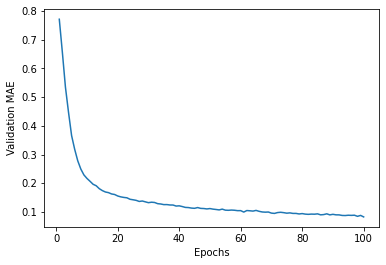

In [45]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [46]:
model = build_model()
model.fit(train_data, train_targets,
epochs=num_epochs, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model.evaluate(val_data1, val_target1)

2/2 [==============================] - 0s 5ms/step - loss: 0.2245 - mae: 0.3499


In [53]:
c=np.array(val_data1.iloc[17])
a=c.reshape(1,23)
display(a)
display(val_data1.iloc[2])

array([[ 0.93619792,  3.03395419, -0.4681493 , -1.12762792,  0.23904572,
         0.58764217, -0.12156907, -0.24188635, -0.19042015, -0.19010076,
         0.80830947, -0.56573277, -0.14543628, -0.40038491, -0.71818883,
         2.07038347, -1.18059269,  0.46105466,  3.23699217, -1.31794592,
        -0.6816179 ,  1.80070815,  2.2143188 ]])

symboling           0.936198
fueltype           -0.327995
aspiration         -0.468149
doornumber         -1.127628
carbody             2.629503
drivewheel         -1.210367
enginelocation     -0.121569
wheelbase          -0.059216
carlength           0.174328
carwidth           -0.143485
carheight          -0.705898
curbweight         -0.029895
enginetype         -0.145436
cylindernumber     -0.400385
enginesize          0.458488
fuelsystem         -0.676727
boreratio           1.071629
stroke              0.779935
compressionratio   -0.212117
horsepower          0.300498
peakrpm            -0.681618
citympg            -0.186409
highwaympg         -0.109087
Name: 168, dtype: float64

In [54]:
val_target1.iloc[17]

price   -0.688673
Name: 183, dtype: float64

In [55]:
model.predict(a)

array([[-0.89986485]], dtype=float32)